In [5]:
import plotly.graph_objects as go

source = [0, 0, 1, 1, 0]
target = [2, 3, 4, 5, 4]
value = [8, 2, 2, 8, 4]

link = dict(source = source, target = target, value = value)
data = go.Sankey(link = link)

fig = go.Figure(data)

fig.show()

In [6]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())

opacity = 0.4
data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # 노드 설정
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # 링크
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Energy forecast for 2050<br>Source: Department of Energy & Climate Change, Tom Counsell via <a href='https://bost.ocks.org/mike/sankey/'>Mike Bostock</a>",
                  font_size=10)

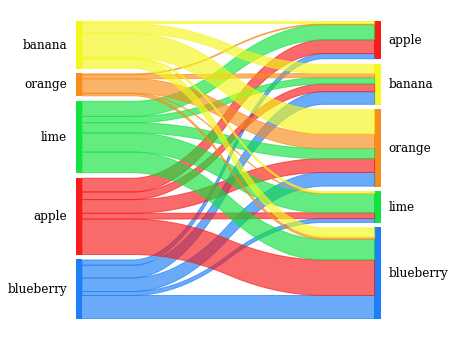

In [10]:
# 기본
import pandas as pd
from pySankey.sankey import sankey

url = "https://raw.githubusercontent.com/anazalea/pySankey/master/pysankey/fruits.txt"
df = pd.read_csv(url, sep=" ", names=["true", "predicted"])
#df

# 색상 지정
colors = {
    "apple": "#f71b1b",
    "blueberry": "#1b7ef7",
    "banana": "#f3f71b",
    "lime": "#12e23f",
    "orange": "#f78c1b"
}

sankey(df["true"], df["predicted"], aspect=20, colorDict=colors, fontsize=12)

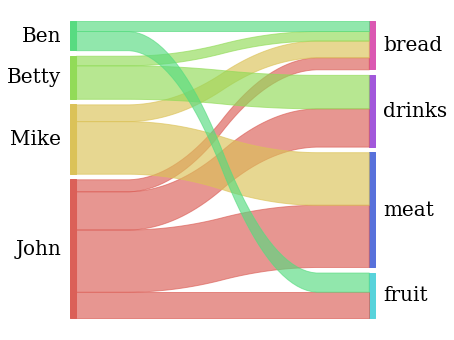

In [11]:
# 가중치
url = "https://raw.githubusercontent.com/anazalea/pySankey/master/pysankey/customers-goods.csv"
df = pd.read_csv(url, sep=",")

sankey(
    left=df["customer"], right=df["good"], 
    leftWeight= df["revenue"], rightWeight=df["revenue"],       # 가중치 지정
    aspect=20, fontsize=20
)

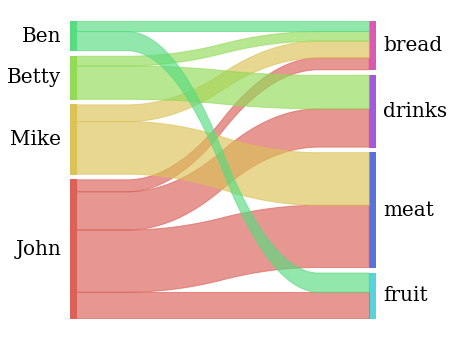

In [18]:
# 그림 저장
import matplotlib.pyplot as plt

sankey(
    left=df["customer"], right=df["good"], 
    leftWeight= df["revenue"], rightWeight=df["revenue"], 
    aspect=20, fontsize=20
)

fig = plt.gcf()

fig.set_size_inches(6, 6)

# 배경색
fig.set_facecolor("w")

#그림저장
fig.savefig("customers-goods.png", bbox_inches="tight", dpi=150)